mean_plot_across_io_length.shape : (55, 55, 1)


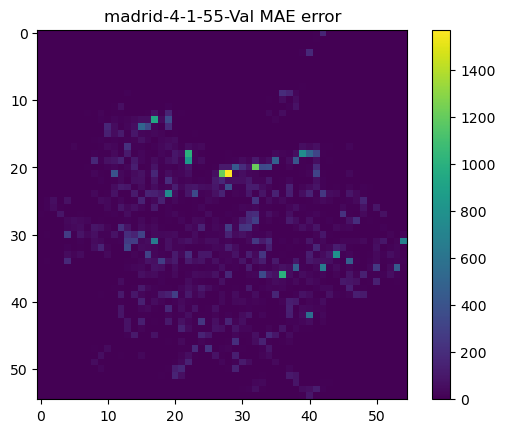

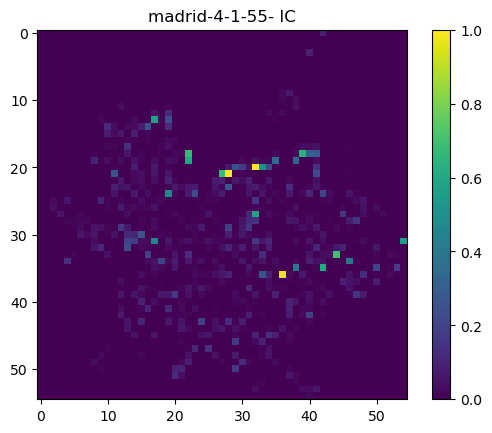

scipy.stats.pearsonr(ic_train_data, val_error) : PearsonRResult(statistic=0.8284791065663524, pvalue=0.0)
scipy.stats.spearmanr(ic_train_data, val_error) : SignificanceResult(statistic=0.8025656653097082, pvalue=0.0)
scipy.stats.kendalltau(ic_train_data, val_error) : SignificanceResult(statistic=0.701587623925318, pvalue=0.0)


In [21]:
import numpy as np
import os
import sys
import glob
from smartprint import smartprint as sprint

sys.path.append('../')

import config
import matplotlib.pyplot as plt
import scipy.stats

fileprefix_list = ["madrid-4-1-55-"]

for prefix in fileprefix_list:
    filenames = glob.glob(os.path.join(os.getcwd(), 
                                       "Spatial_results_validation_errors/", prefix + "-spatial-errors", "*.npy"))
    a = 0
    for npy in filenames:
        a = a + np.load(npy)
    a = a/len(filenames)
    max_ = np.max(a)
    
    mean_plot_across_io_length = np.mean(a, axis=0)
    sprint (mean_plot_across_io_length.shape)
    
    plt.imshow((mean_plot_across_io_length[:, :, 0]) ** 0.5)
    
    plt.title(prefix + "Val MAE error")
    plt.colorbar()
    plt.show()
    
    val_error = ((mean_plot_across_io_length[:, :, 0])).flatten()
    

    filenames = glob.glob(os.path.join(os.getcwd(), 
                                       "Spatial_results_multiple_runs", prefix, "_PM_spatial_complexity*.npy"))
    a = 0
    for npy in filenames:
        a = a + np.load(npy)
    max_ = np.max(a)

    plt.imshow(a/max_)
    
    plt.title(prefix + " IC")
    plt.colorbar()
    
    plt.show()    
    
    ic_train_data = a.flatten()
    
    sprint (scipy.stats.pearsonr(ic_train_data, val_error))
    sprint (scipy.stats.spearmanr(ic_train_data, val_error)) 
    sprint (scipy.stats.kendalltau(ic_train_data, val_error))

(4, 55, 55, 1)

In [22]:
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])